<a href="https://colab.research.google.com/github/manishlalwani123/Applicaiton/blob/main/EmotionSense_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import string
from collections import Counter

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
text = open("read.txt", encoding="utf-8").read()

In [ ]:
lower_case = text.lower()

In [ ]:
# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

In [ ]:
# splitting text into words
tokenized_words = cleaned_text.split()

In [ ]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
 'you', 'your', 'yours', 'yourself', 'yourselves',
 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those',
 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
 'have', 'has', 'had', 'having',
 'do', 'does', 'did', 'doing',
 'a', 'an', 'the',
 'and', 'but', 'if', 'or', 'because', 'as',
 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below',
 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
 'again', 'further', 'then', 'once',
 'here', 'there', 'when', 'where', 'why', 'how',
 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
 'can', 'will', 'just', 'don', 'should', 'now']

In [ ]:
# Removing stop words from the tokenized words list
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)

In [ ]:
emotion_list = []

with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()

        # Skip lines that don't contain ":"
        if ":" not in clear_line:
            continue

        word, emotion = clear_line.split(':')

        if word in final_words:
            emotion_list.append(emotion)


In [ ]:
print(emotion_list)
w = Counter(emotion_list)
print(w)

[' happy', ' happy', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled', ' happy', ' loved', ' hated', ' entitled']
Counter({' happy': 5, ' hated': 2, ' entitled': 2, ' attached': 1, ' attracted': 1, ' alone': 1, ' free': 1, ' loved': 1})


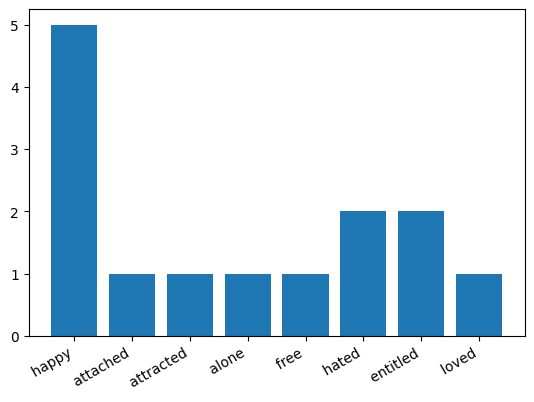

In [ ]:

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [ ]:
# main Nltk

import nltk
# nltk.download()

nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [ ]:
text = open('read.txt', encoding='utf-8').read()
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))


In [ ]:
# Using word_tokenize because it's faster than split()
tokenized_words = word_tokenize(cleaned_text, "english")


In [ ]:
nltk.download('stopwords')
# Removing Stop Words
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('wordnet')
# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
emotion_list = []

with open('emotions.txt', 'r', encoding='utf-8') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()

        # Skip lines that don't contain exactly one ':'
        if ':' not in clear_line:
            continue

        try:
            word, emotion = clear_line.split(':')
            if word in lemma_words:
                emotion_list.append(emotion)
        except ValueError:
            print(f"Skipping invalid line: {clear_line}")


In [ ]:
print(emotion_list)
w = Counter(emotion_list)
print(w)

[' happy', ' happy', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled', ' happy', ' loved', ' hated', ' entitled']
Counter({' happy': 5, ' hated': 2, ' entitled': 2, ' attached': 1, ' attracted': 1, ' alone': 1, ' free': 1, ' loved': 1})


In [ ]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")

In [ ]:
nltk.download('vader_lexicon')
sentiment_analyse(cleaned_text)


Positive Sentiment


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


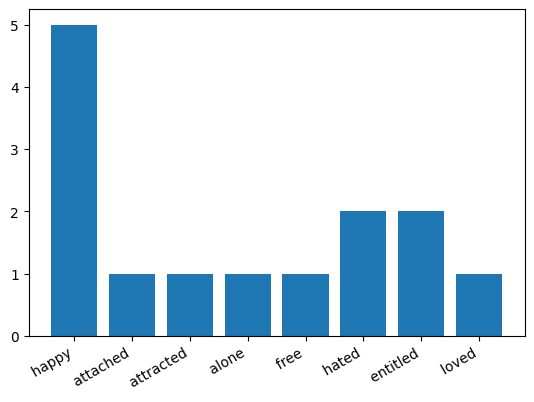

In [ ]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [ ]:
# twitter analysis
